# 1.  Introduction

# What does Customer Churn Mean?

Customer churn refers to the situation when a firm or service loses customers or subscribers.

In the highly competitive telecommunications industry, customers have many service providers to choose from and frequently switch between them. The annual churn rate for this sector ranges between 15% and 25%.

Because most firms have a large number of customers, it is challenging to provide individualized customer retention efforts to each of them. Devoting excessive time and resources to each customer is not feasible, as it would outweigh the additional revenue. However, if a company could anticipate which customers are likely to discontinue their services, it could focus retention efforts solely on these "high risk" clients. Ultimately, the goal is to expand the customer base and enhance customer loyalty, which is the key to success in this market.

Customer churn is a vital metric because it is less expensive to retain existing customers than to acquire new ones. To minimize customer churn, telecommunications firms must predict which customers are at high risk of leaving.

To detect early signs of potential churn, it is necessary to have a comprehensive understanding of the customers and their interactions across various channels, such as in-store visits, product purchase histories, customer service calls, web-based transactions, and social media interactions.

Therefore, addressing churn is critical for businesses to not only maintain their market position but also thrive and grow. The more customers a company has in its network, the lower the cost of initiation and the higher the profit. As a result, reducing client attrition and implementing an effective retention strategy are key factors in a company's success.

# Some initial feature engineering/ cleaning up:
1. Get rid of ID
2. Deal with NaN values
3. Deal with outliers

# To address the points above, I will structure my investigation in this format:
## My exploration would focus on this H0: the users' characteristics as well as the type of their plan **bear no correlation** to their churning rate
## My alternative hypothesis (formulated after initial exploration) is that: certain variables such as **tenure, total charge, monthly charge as well as package variables** correlate to the churning rate and **can be used to predict whether the user will churn**.

## This is extremely important for the business side of Telco as retaining customers is more cost effective rather than trying to attrach new ones

# 2. Cleaning-up 

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt
import missingno as msno

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

customer_data = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
customer_data.head()

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


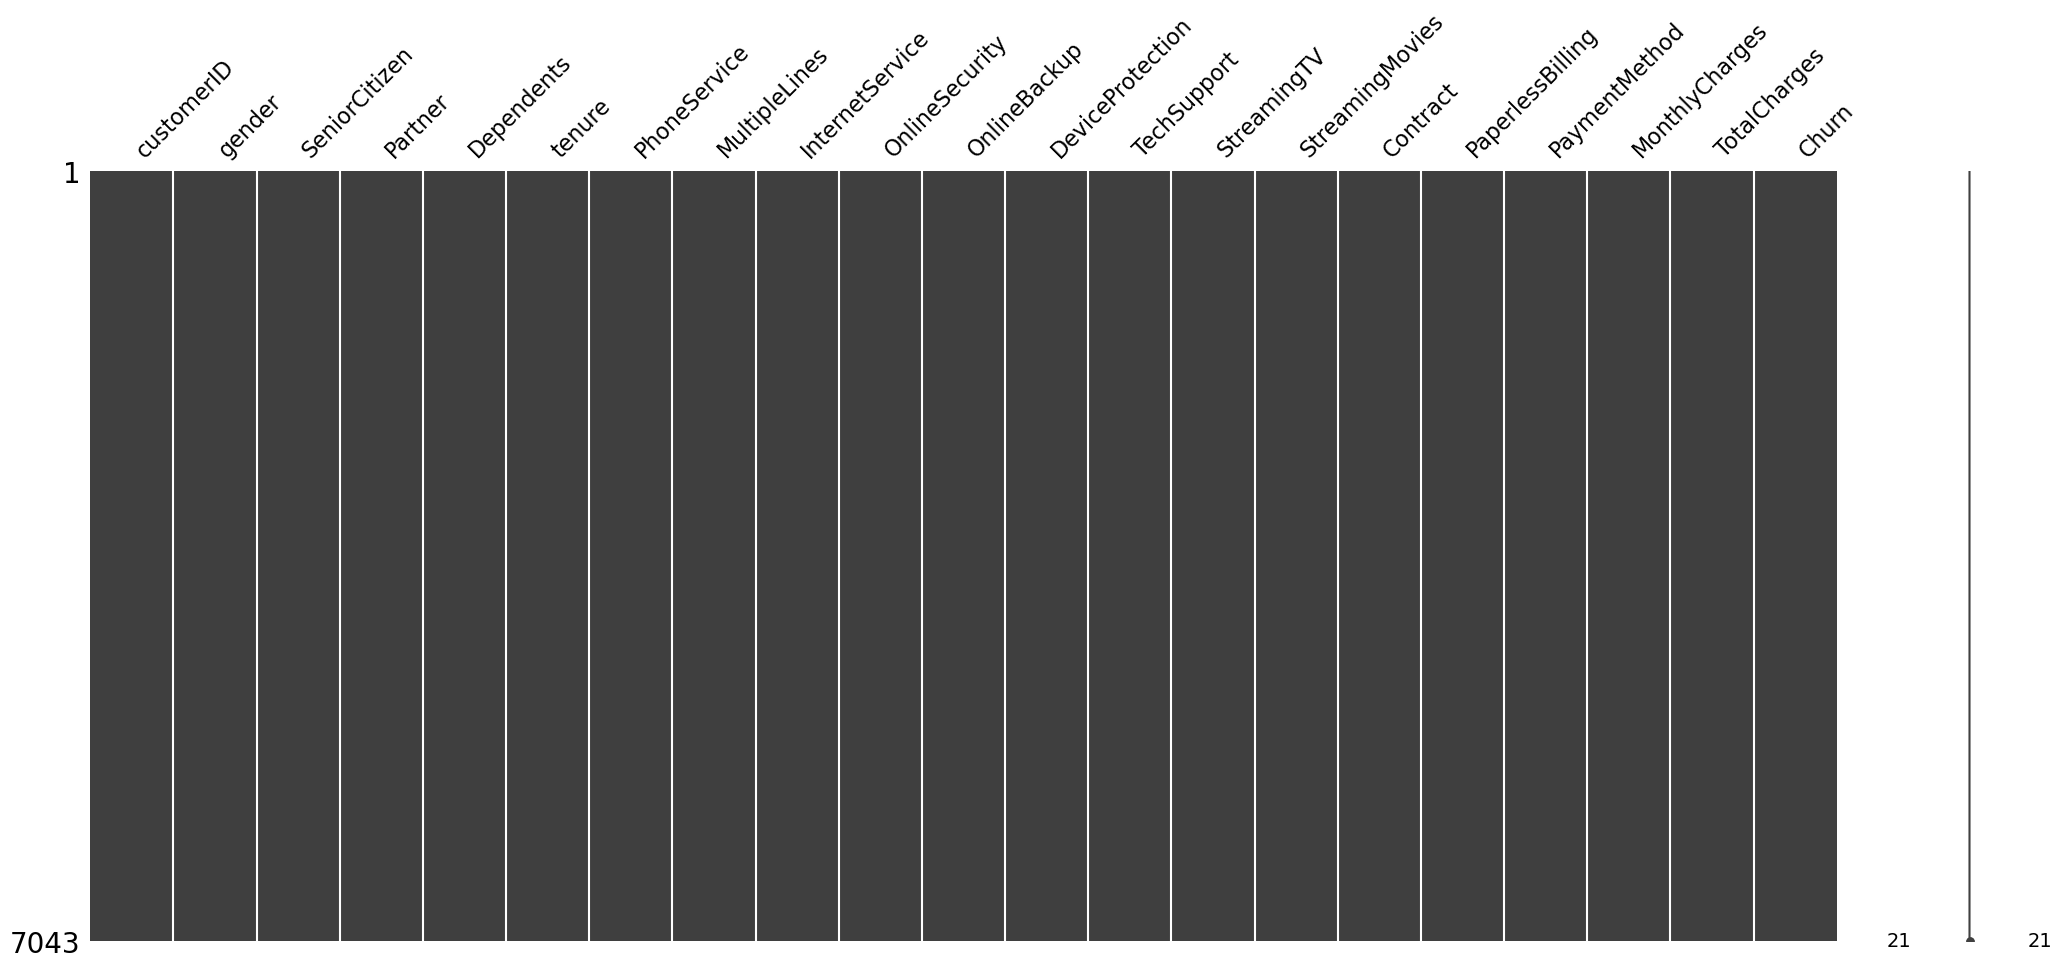

In [4]:
msno.matrix(customer_data);

Out of the 21 columns there are:

    1. Primary key (customer id)
    2. Boolean encoders (eg. Partner, Churn)
    3. Binary encoders (eg. SeniorCitizen)
    4. Float values (eg. tenure)
    5. Categorical values (eg. Multiple lines)
    
First task: standardise the encoders into one type and since most are boolean, we'll convert the senior citizen to a boolean one as well
+ total charges as int

In [5]:
customer_data['SeniorCitizen'] = customer_data['SeniorCitizen'].apply(lambda x: "Yes" if x == 1 else "No")

In [6]:
customer_data["TotalCharges"] = pd.to_numeric(customer_data["TotalCharges"] , errors = "coerce")
customer_data["TotalCharges"].isnull().sum()

11

### Checking for NaN values

In [7]:
customer_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
customer_data[np.isnan(customer_data['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,No,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


We can also notice that in the entries where the TotalCharges field is empty, the tenure has a value of 0.

In [9]:
customer_data.drop(labels=customer_data[customer_data['tenure'] == 0].index, axis=0, inplace=True)
customer_data[customer_data['tenure'] == 0].index

Int64Index([], dtype='int64')

In [10]:
customer_data.fillna(customer_data["TotalCharges"].mean())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [11]:
customer_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
customer_data = customer_data.drop(['customerID'], axis = 1)
customer_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Divide into categorical and numerical variables

In [13]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
customer_data[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


### Outliers:
+ Boxplots are an easy visual way to display any outliers

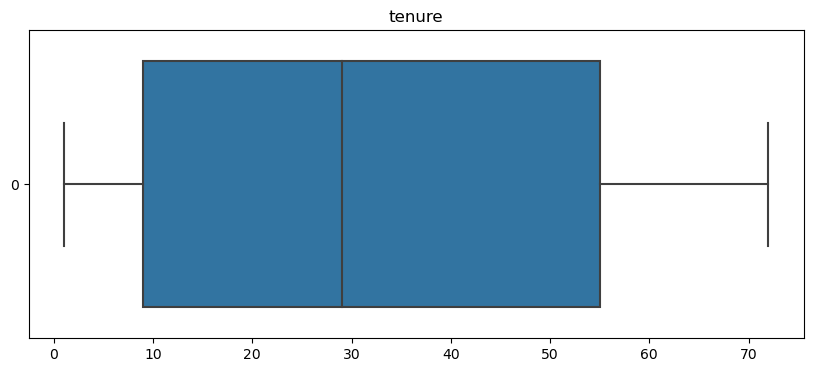

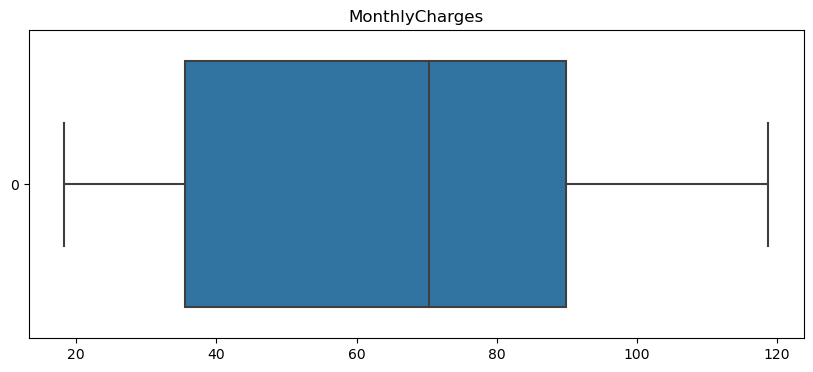

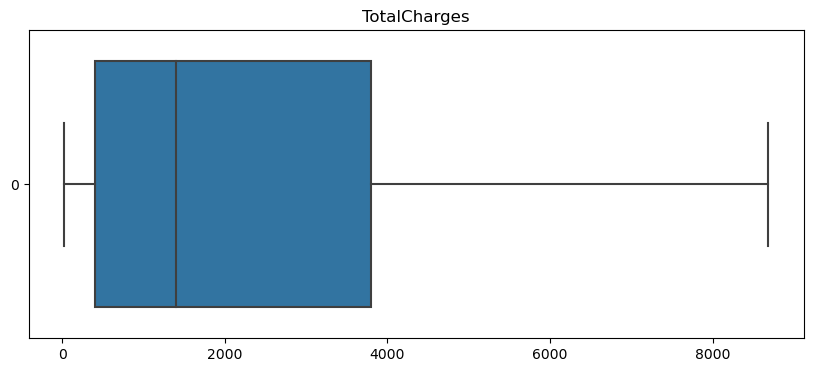

In [16]:
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.graphics.gofplots import qqplot

def Box_plots(df):
    plt.figure(figsize=(10, 4))
    plt.title(i)
    sns.boxplot(df, orient= "horizontal")
    plt.show()

for i in numerical_cols:
    Box_plots(customer_data[i])

### No obvious outlers present in the numerical variables

## Label encoding for the graph building

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df1 = customer_data.copy(deep = True)
text_data_features = [i for i in list(customer_data.columns) if i not in list(customer_data.describe().columns)]

print('Label Encoder Transformation')
for i in text_data_features :
    df1[i] = le.fit_transform(df1[i])
    print(i,' : ',df1[i].unique(),' = ',le.inverse_transform(df1[i].unique()))

Label Encoder Transformation
gender  :  [0 1]  =  ['Female' 'Male']
SeniorCitizen  :  [0 1]  =  ['No' 'Yes']
Partner  :  [1 0]  =  ['Yes' 'No']
Dependents  :  [0 1]  =  ['No' 'Yes']
PhoneService  :  [0 1]  =  ['No' 'Yes']
MultipleLines  :  [1 0 2]  =  ['No phone service' 'No' 'Yes']
InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
OnlineBackup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
DeviceProtection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
TechSupport  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingTV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingMovies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]  =  ['Yes' 'No']
PaymentMethod  :  [2 3 0 1]  =  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  [0 1]  =  ['No' 'Yes']


In [70]:
df_graph = df1.drop("Churn", axis = 1)

# 3. Exploration:

### Heatmap to compare the differences between the churned and not-churned users

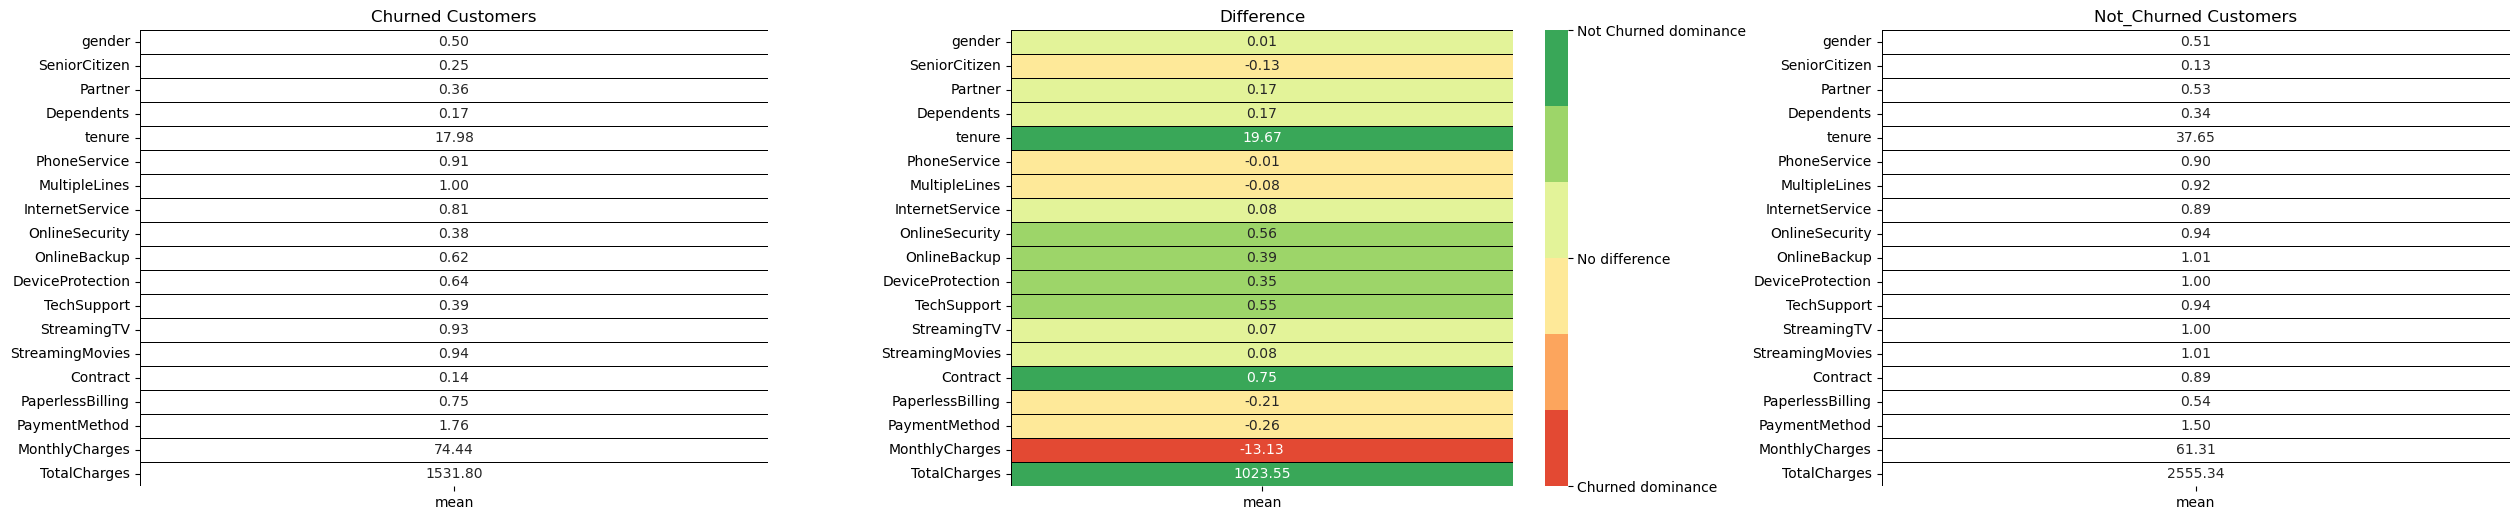

In [119]:
import seaborn as sns

# define the datasets
churn = df1[df1['Churn'] == 1].describe().T
not_churn = df1[df1['Churn'] == 0].describe().T
difference = not_churn - churn

#Drop variables
difference = difference.drop('Churn')
churn = churn.drop("Churn")
not_churn = not_churn.drop("Churn")

#White color palette
white_palette = sns.color_palette("Greys", as_cmap=True)

#Three plots
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25, 5))
plt.subplot(1, 3, 1)
sns.heatmap(churn[['mean']], annot=True, cmap=white_palette, vmin=0, vmax = 1000000, linewidths=0.4, linecolor='black', cbar=False, fmt='.2f')
plt.title('Churned Customers');

plt.subplot(1, 3, 2)
heatmap = sns.heatmap(difference[['mean']], annot=True, cmap=cmap, vmin=-1, vmax=1, linewidths=0.4, linecolor='black', cbar_kws={"orientation": "vertical", "ticks": [-1, 0, 1]}, fmt='.2f')
plt.title('Difference');
cbar = heatmap.collections[0].colorbar
cbar.set_ticks([-1, 0, 1])
cbar.set_ticklabels(['Churned dominance', 'No difference', 'Not Churned dominance'])

plt.subplot(1, 3, 3)
sns.heatmap(not_churn[['mean']], annot=True, cmap=white_palette, linewidths=0.4, vmin=0, vmax = 1000000, linecolor='black', cbar=False, fmt='.2f',)
plt.title('Not_Churned Customers');

fig.tight_layout(pad=0)


<BarContainer object of 6 artists>

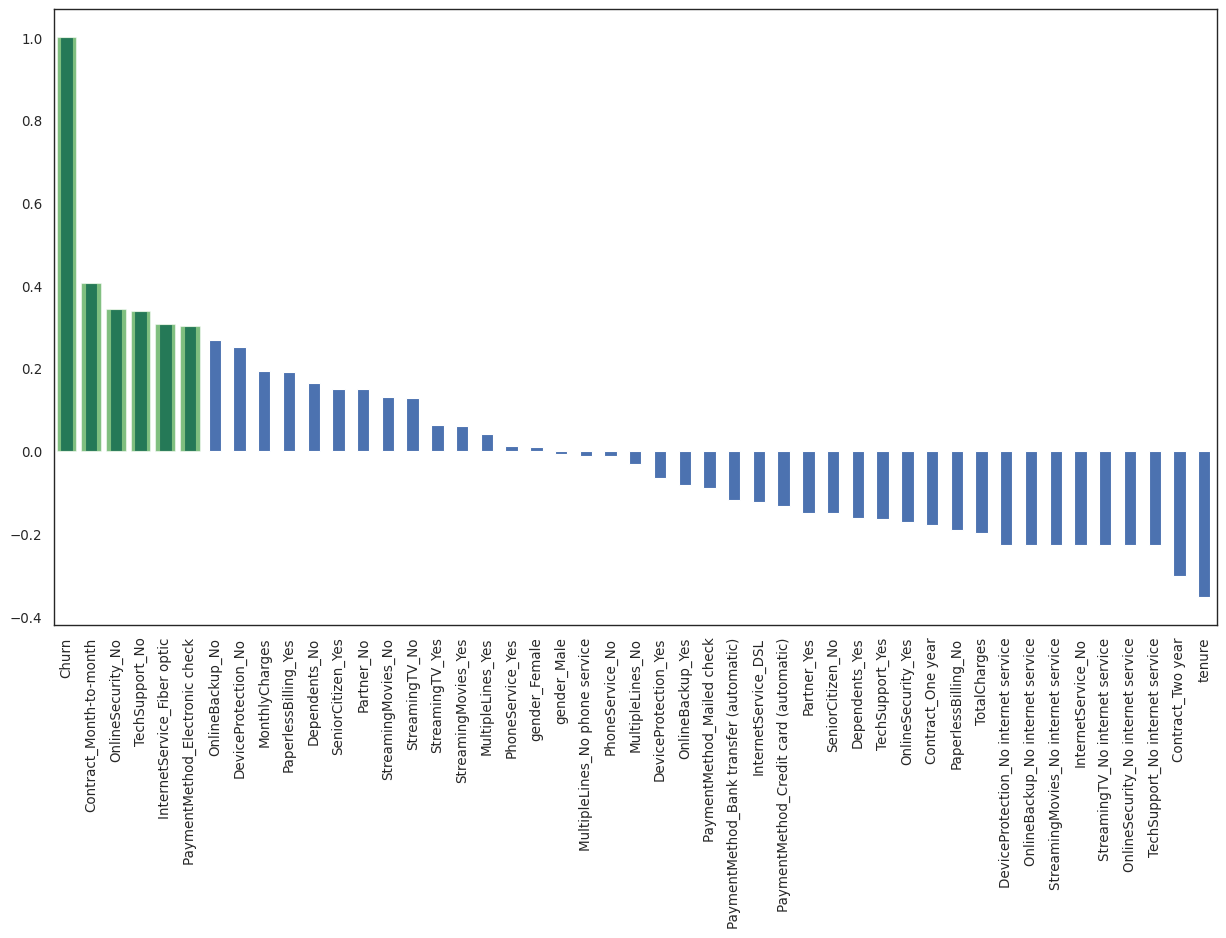

In [173]:
fig, ax = plt.subplots(figsize=(15, 8))
customer_data['Churn'].replace(to_replace='Yes', value=1, inplace=True)
customer_data['Churn'].replace(to_replace='No',  value=0, inplace=True)
df_dummies = pd.get_dummies(customer_data)

df_dummies_sorted = df_dummies.corr()['Churn'].sort_values(ascending = False)
df_dummies_sorted_desc = df_dummies.corr()['Churn'].sort_values(ascending = True)

df_dummies_sorted.plot(kind='bar', label = True)

df_dummies_strong_above = df_dummies_sorted.apply(lambda x :x if x>0.3 else None).dropna()
strong_above = df_dummies_strong_above.index
df_dummies_strong_above.dropna()

ax.bar(strong_above, df_dummies.corr()['Churn'].loc[strong_above], color='green', alpha=0.5)
print(df_dummies_strong_below)

## We can zoom in on values which have a correlation of +- 0.3 which signifies a strong correlation

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator


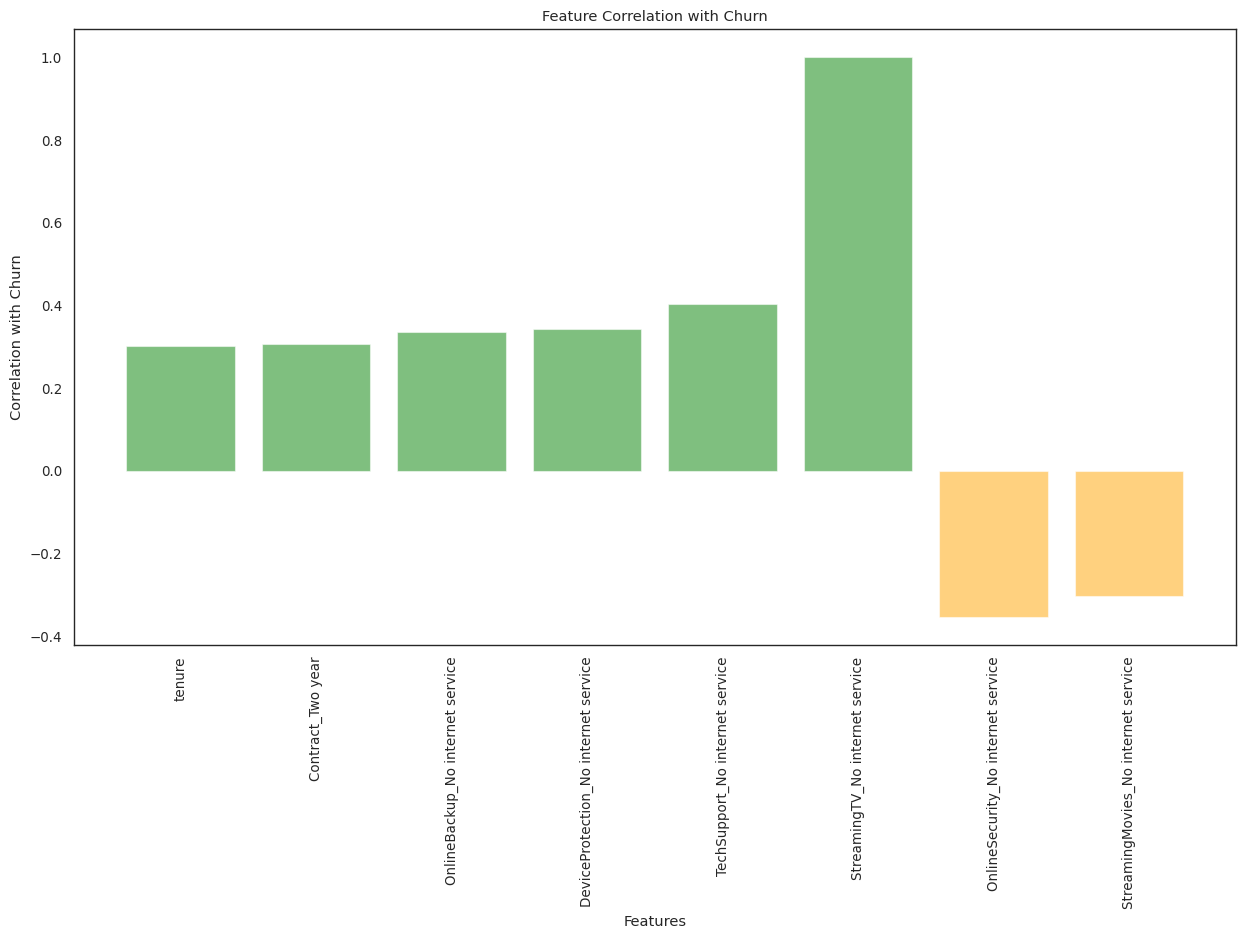

In [168]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 8))

customer_data['Churn'].replace(to_replace='Yes', value=1, inplace=True)
customer_data['Churn'].replace(to_replace='No',  value=0, inplace=True)

df_dummies = pd.get_dummies(customer_data)

df_dummies_sorted = df_dummies.corr()['Churn'].sort_values(ascending=True)

df_dummies_strong_above = df_dummies_sorted.apply(lambda x: x if x > 0.3 else None).dropna()
strong_above = df_dummies_strong_above.index
df_dummies_strong_above.dropna()

df_dummies_strong_below = df_dummies_sorted.apply(lambda x: x if x < -0.3 else None).dropna()
strong_below = df_dummies_strong_below.index
df_dummies_strong_below.dropna()

ax.bar(strong_above, df_dummies.corr()['Churn'].loc[strong_above], color='green', alpha=0.5)
ax.bar(strong_below, df_dummies.corr()['Churn'].loc[strong_below], color='orange', alpha=0.5)

ax.set_xticklabels(df_dummies_sorted.index, rotation=90)
ax.set_ylabel('Correlation with Churn')
ax.set_xlabel('Features')
ax.set_title('Feature Correlation with Churn')

plt.show()


In [174]:
print(df_dummies_strong_above)

Churn                             1.000000
Contract_Month-to-month           0.404565
OnlineSecurity_No                 0.342235
TechSupport_No                    0.336877
InternetService_Fiber optic       0.307463
PaymentMethod_Electronic check    0.301455
Name: Churn, dtype: float64


In [175]:
print(df_dummies_strong_below)

Contract_Two year   -0.301552
tenure              -0.354049
Name: Churn, dtype: float64


### Takeaways: 
+ Contract type month-to-month, having no online security and no techsupport has the highest correlation
+ Contract type two year and tenure have the lease correlation

## Confirmation of the previous graph, we now have 8 variables that we should focus on (contract, tenure, total charge, monthly charge, online security, backup, tech support and device protection). perhaps also internet service

+ I will not be investigating variables such as: gender as I don't see a high correlation or a difference in the number of users

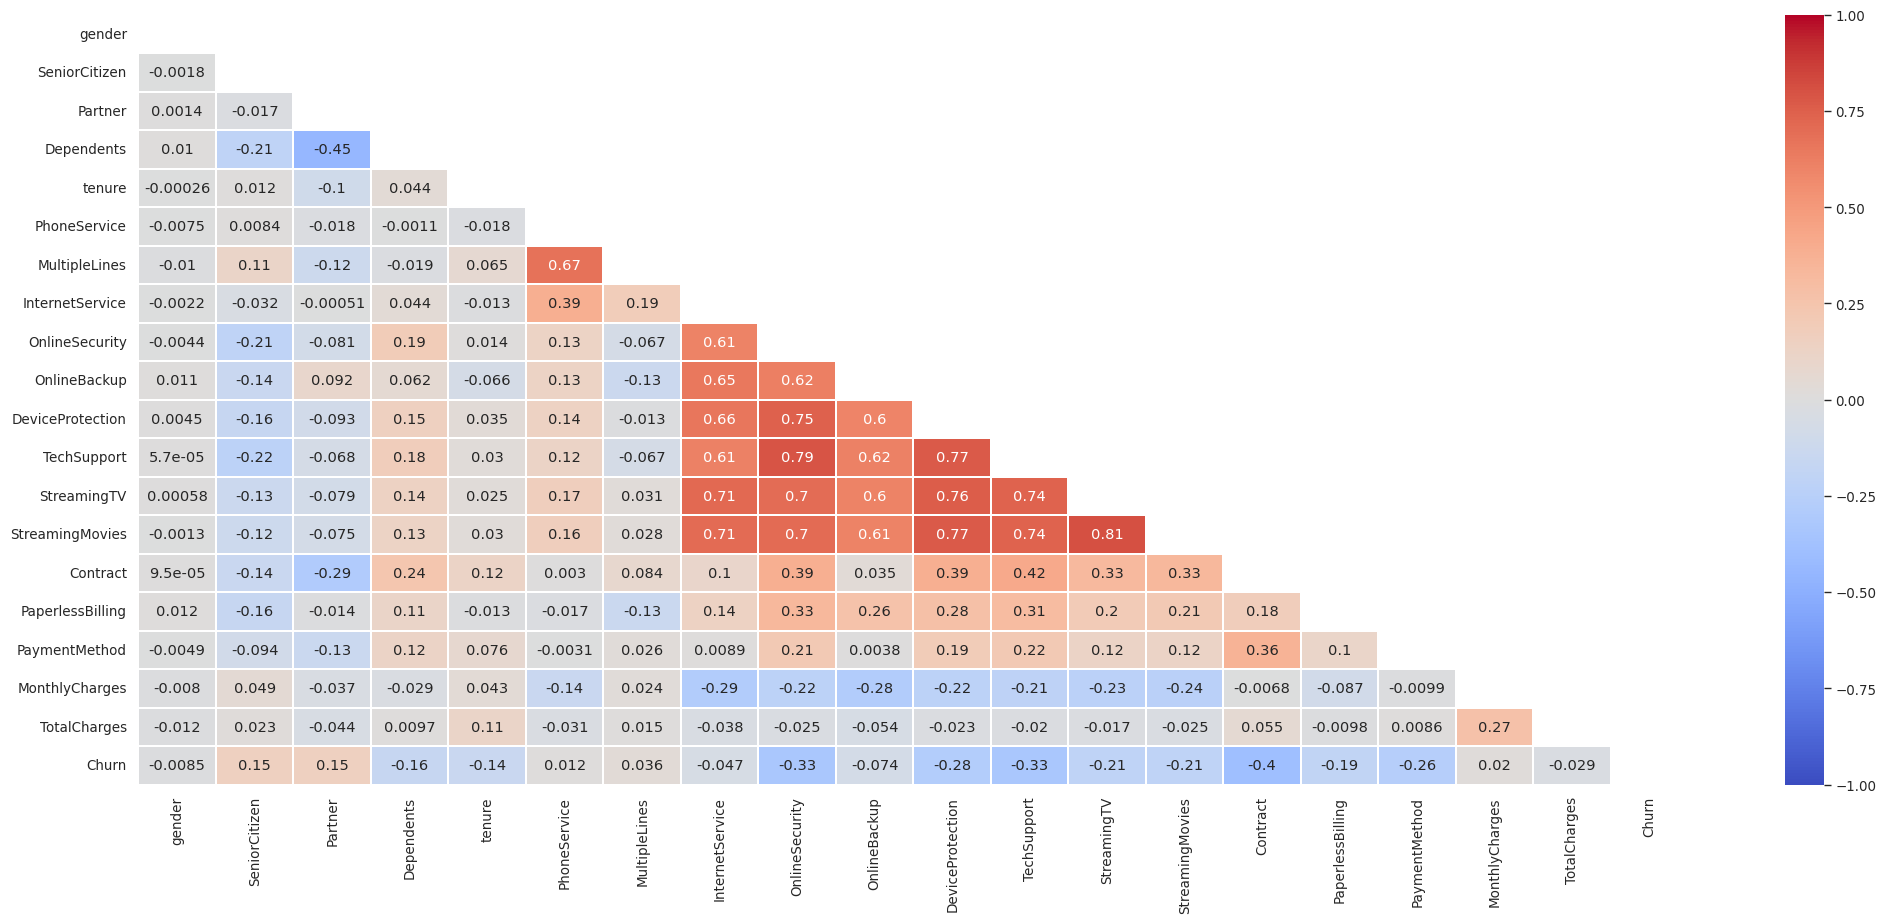

In [194]:
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

## This is interesting because it shows that customers who buy one add-on eg. OnlineSecurity are also likely to opt-in for tech supprt, streamingTV, etc.
## The red triangle shows us that users prefer to opt in for more than add-on at the same time

## And since opting out of OnlineSecurity and TechSupport is highly correlated to churning, perhaps there is some connection there too

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/s

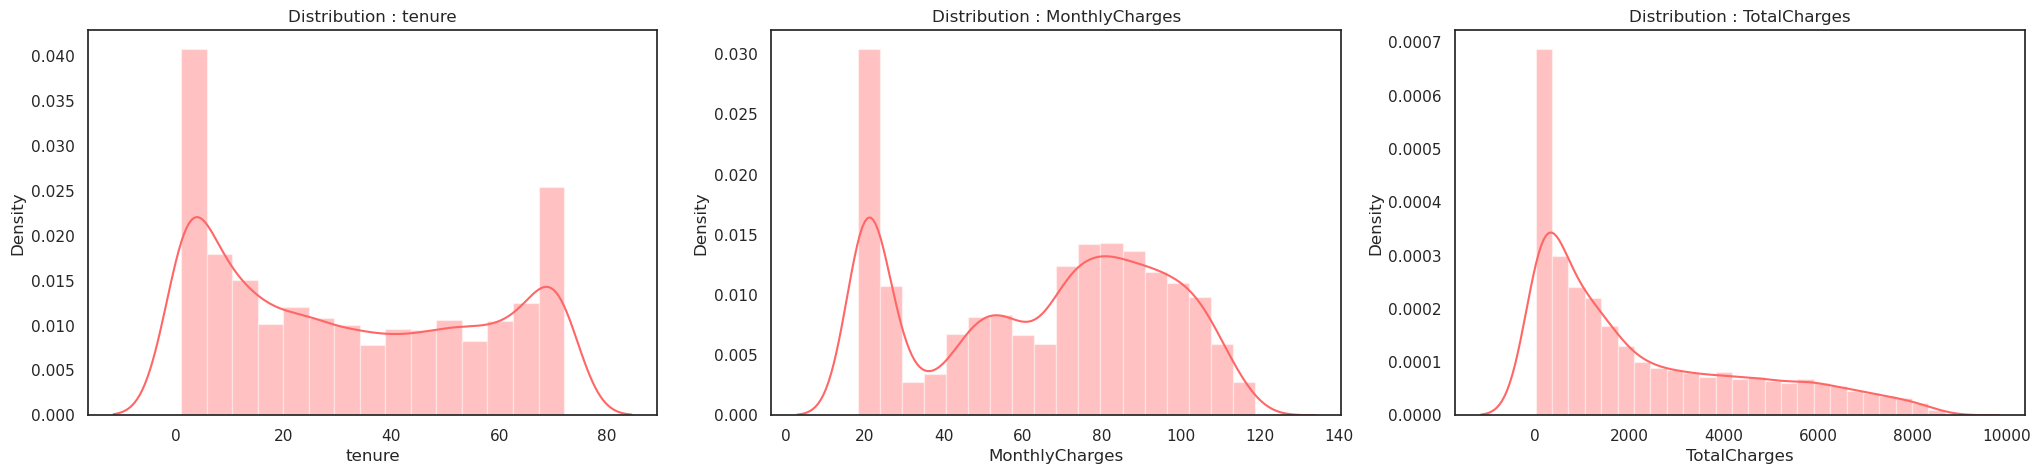

In [135]:
fig, ax = plt.subplots(nrows = 1,ncols = 3,figsize = (25,5))

for i in range(len(numerical_cols)):
    plt.subplot(1,3,i+1)
    sns.distplot(df1[numerical_cols[i]],color = colors[0])
    title = 'Distribution : ' + numerical_cols[i]
    plt.title(title)
plt.show()

## Key points:
### + Tenure has two peaks: 0-5 and 70+, depending on the age of the company this could be the imitators and innovators of the market (early adopters and late adopters)
### + Monthly Charges follow the same structure of two peaks (20 and 80).
### + Total Charges has a high negative slope, high right skew and a distinct pattern of most users having low total charges (0-2000) perhaps signifying that most are new 

## I will now prepare to investigate my null hypothesis and attempt to disprove it

In [186]:
import plotly.express as px
fig = px.box(df, x='Churn', y = 'tenure')

# Update yaxis properties
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)

fig.show()

## Monthly charges:

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  """


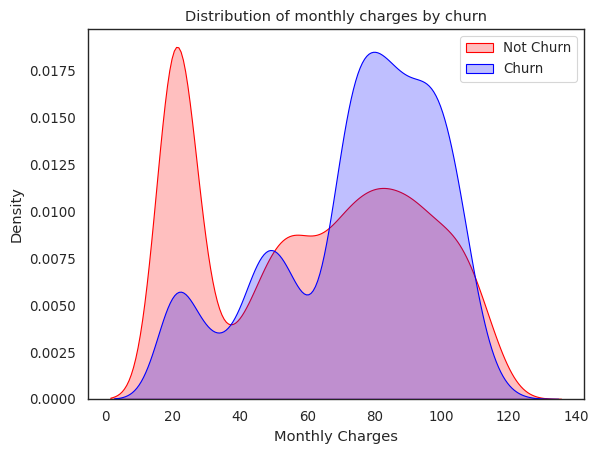

In [139]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

### Key points:
#### + This graph is displaying that not-churned users are predominantly paying between the 0-40 range and the wide-trophed 40-120 range
#### + Additionally, those who do churn do so at the specific prices of 20, 50 and most importantly around the 70-120 range

#### My key takeaway would be that, the customer-retention team should focus on the users who pay more than 60/70 as that's the price at which the customers deem the product to be too expensive and subsequently churn

## Total Charges:

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  after removing the cwd from sys.path.


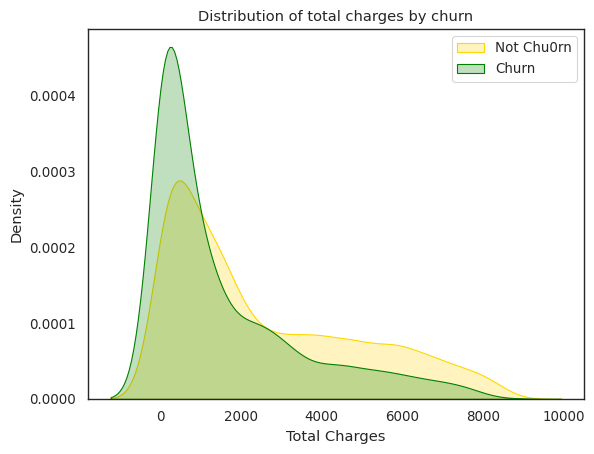

In [141]:
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="Gold", shade = True);
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Green", shade= True);
ax.legend(["Not Chu0rn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');


## Investigating the insights gained previously:

In [204]:
sns.countplot(data=customer_data, x= customer_data["TotalCharges"], hue="Churn")

KeyboardInterrupt: 

TypeError: countplot() got multiple values for argument 'data'

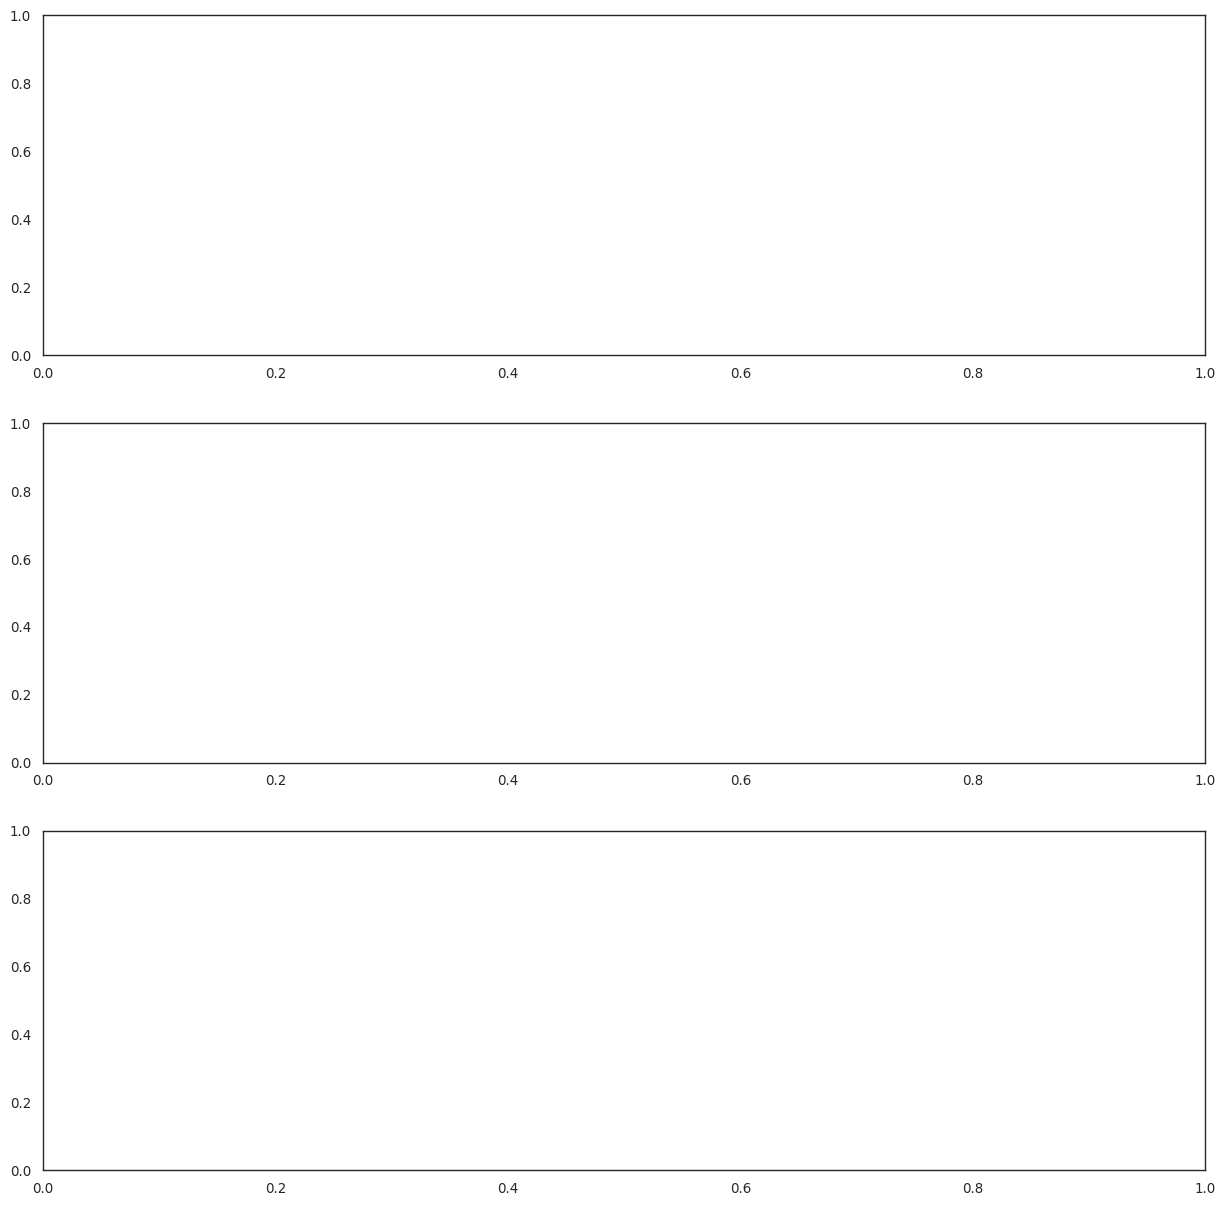

In [197]:
fig, ax = plt.subplots(nrows = 3,ncols = 1,figsize = (15,15))
for i in range(len(numerical_cols)):
    plt.subplot(3,1,i+1)
    sns.countplot(numerical_cols[i],data = consumer_data, x= consumer_data["Churn"], x= consumer_data["Churn"] ,hue = "Churn",palette = colors,edgecolor = 'black')
    plt.legend(['No Churn','Churn'],loc = 'upper left')
    title = numerical_cols[i] + ' w.r.t Churn'
    plt.title(title);


TypeError: countplot() got multiple values for argument 'data'

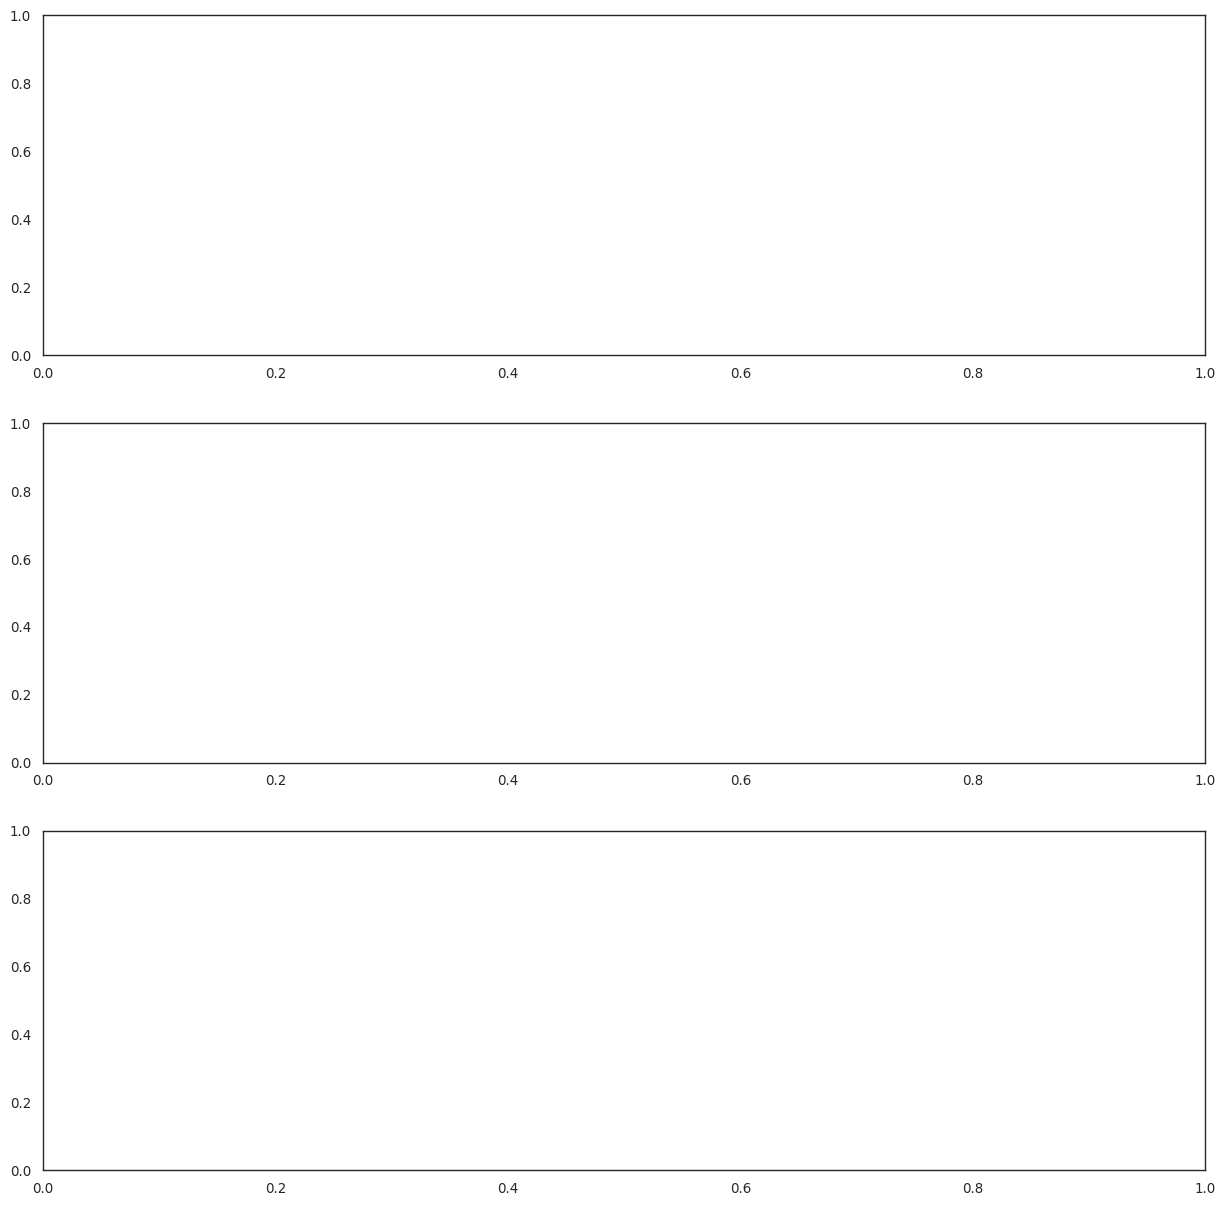

In [191]:
fig, ax = plt.subplots(nrows = 3,ncols = 1,figsize = (15,15))
for i in range(len(numerical_cols)):
    plt.subplot(3,1,i+1)
    sns.countplot(numerical_cols[i],data = customer_data[numerical_cols],hue = "Churn",palette = colors,edgecolor = 'black')
    plt.legend(['No Churn','Churn'],loc = 'upper left')
    title = numerical_cols[i] + ' w.r.t Churn'
    plt.title(title);
    

Credit to BHARTI PRASAD 

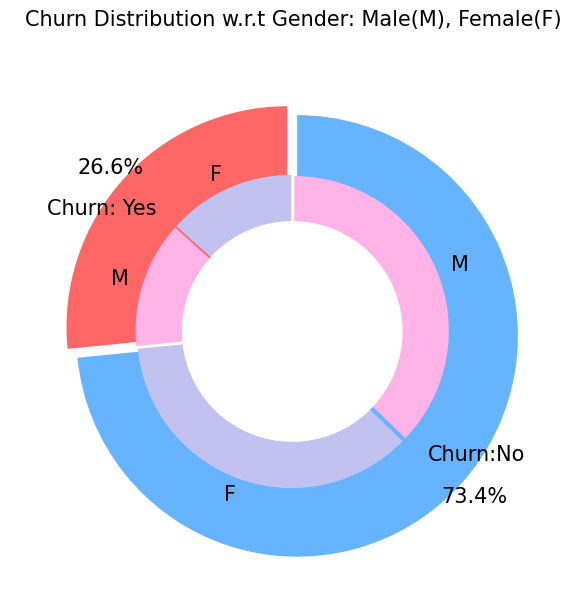

In [120]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["Senior","Non-Senior","Senior","Non-Senior"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()